In [1]:
#implementación del mapa gráfico (actualizar por un mapa en colombia o de la zona donde va a ser utulizado)
#se incluye la representación visual de las ciudades (campamentos)
# y de las conexiones entre ellas

import numpy as np
import math
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

united_states_map = mpimg.imread("input/united_states_map.png")
def show_cities(path, w=12, h=8):
    """Plot a TSP path overlaid on a map of the US States & their capitals."""
    if isinstance(path, dict):      path = list(path.values())
    if isinstance(path[0][0], str): path = [ item[1] for item in path ]    
    plt.imshow(united_states_map)    
    for x0, y0 in path:
        plt.plot(x0, y0, 'y*', markersize=15)  # y* = yellow star for starting point        
    plt.axis("off")
    fig = plt.gcf()
    fig.set_size_inches([w, h])

   
def show_path(path, starting_city=None, w=12, h=8):
    """Plot a TSP path overlaid on a map of the US States & their capitals."""
    if isinstance(path, dict):      path = list(path.values())
    if isinstance(path[0][0], str): path = [ item[1] for item in path ]
    
    starting_city = starting_city or path[0]
    x, y = list(zip(*path))
    #_, (x0, y0) = starting_city
    (x0, y0) = starting_city
    plt.imshow(united_states_map)
    plt.plot(x0, y0, 'y*', markersize=5)  # y* = yellow star for starting point
    plt.plot(x + x[:1], y + y[:1])  # include the starting point at the end of path
    plt.axis("off")
    fig = plt.gcf()
    fig.set_size_inches([w, h])
    
    
def polyfit_plot(x,y,deg, **kwargs):
    coefficients = np.polyfit(x,y,deg,**kwargs)
    poly  = np.poly1d(coefficients)
    new_x = np.linspace(x[0], x[-1])
    new_y = poly(new_x)
    plt.plot(x, y, "o", new_x, new_y)
    plt.xlim([x[0]-1, x[-1] + 1 ])
    
    terms = []
    for p, c in enumerate(reversed(coefficients)):
        term = str(round(c,1))
        if p == 1: term += 'x'
        if p >= 2: term += 'x^'+str(p)
        terms.append(term)        
    plt.title(" + ".join(reversed(terms)))       

In [2]:
#Calcula distancia euclidiana entre dos puntos

def distance(xy1, xy2) -> float:
    if isinstance(xy1[0], str): 
        xy1 = xy1[1]; xy2 = xy2[1];               # if xy1 == ("Name", (x,y))
    return math.sqrt( (xy1[0]-xy2[0])**2 + (xy1[1]-xy2[1])**2 )


#Calcula distancia total de un camino en un conjunto de puntos 
def path_distance(path) -> int:
    if isinstance(path, dict):      
        path = list(path.values())            # if path == {"Name": (x,y)}
    if isinstance(path[0][0], str): 
        path = [ item[1] for item in path ]   # if path == ("Name", (x,y))
    return int(sum(
        [ distance(path[i],  path[i+1]) for i in range(len(path)-1) ]
      + [ distance(path[-1], path[0]) ]                                   # include cost of return journey
    ))

{'Oklahoma City': (392.8, 356.4), 'Montgomery': (559.6, 404.8), 'Saint Paul': (451.6, 186.0), 'Trenton': (698.8, 239.6), 'Salt Lake City': (204.0, 243.2), 'Columbus': (590.8, 263.2), 'Austin': (389.2, 448.4), 'Phoenix': (179.6, 371.2), 'Hartford': (719.6, 205.2), 'Baton Rouge': (489.6, 442.0), 'Salem': (80.0, 139.2), 'Little Rock': (469.2, 367.2), 'Richmond': (673.2, 293.6), 'Jackson': (501.6, 409.6), 'Des Moines': (447.6, 246.0), 'Lansing': (563.6, 216.4), 'Denver': (293.6, 274.0), 'Boise': (159.6, 182.8), 'Raleigh': (662.0, 328.8), 'Atlanta': (585.6, 376.8), 'Madison': (500.8, 217.6), 'Indianapolis': (548.0, 272.8), 'Nashville': (546.4, 336.8), 'Columbia': (632.4, 364.8), 'Providence': (735.2, 201.2), 'Boston': (738.4, 190.8), 'Tallahassee': (594.8, 434.8), 'Sacramento': (68.4, 254.0), 'Albany': (702.0, 193.6), 'Harrisburg': (670.8, 244.0)}


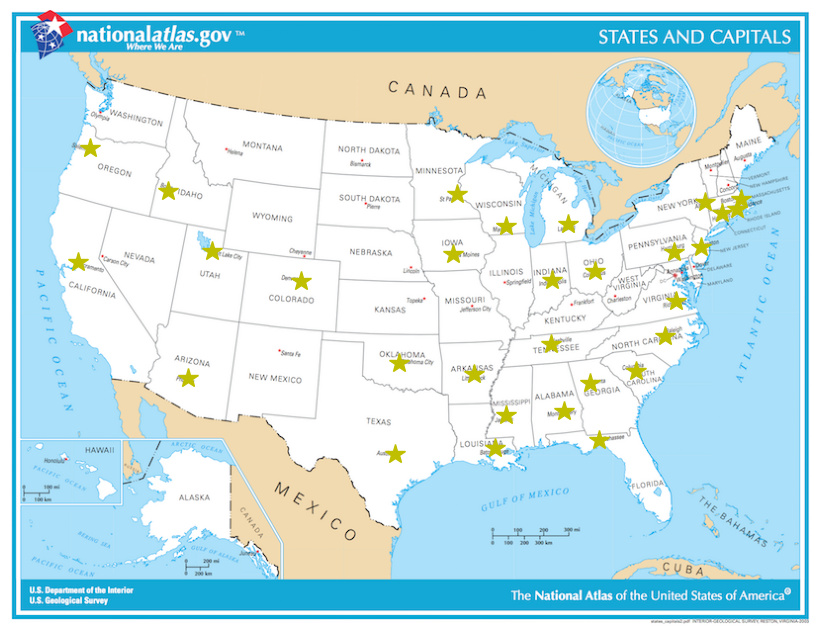

In [28]:
import csv

cities = {}

with open('input/Ciudades.csv', newline='', encoding='utf-8-sig') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=';')
    for row in reader:
        city = row['city']
        x = float(row['x'].replace(',', '.'))
        y = float(row['y'].replace(',', '.'))
        cities[city] = (x, y)

print(cities)
show_cities(cities)

In [ ]:
import csv

tabla_inclinacion = {}

with open('input/Factor_Inclinacion.csv', newline='', encoding='utf-8-sig') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=';')
    for row in reader:
        city = row['city']
        x = float(row['x'].replace(',', '.'))
        y = float(row['y'].replace(',', '.'))
        cities[city] = (x, y)

print(cities)


In [4]:
import csv

factor_evaporacion = 0
factor_distancia = 0
factor_inclinacion = 0
factor_clima = 0
factor_momento_dia = {}


with open('input/Tabla_Factores.csv', newline='', encoding='utf-8-sig') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=';')
    for row in reader:
        factor = row['Factor']
        valor = float(row['Valor'].replace(',', '.'))  # Reemplaza ',' por '.' para convertir a flotante
        if factor == 'evaporacion':
            factor_evaporacion = valor
        elif factor == 'distancia':
            factor_distancia = valor
        elif factor == 'inclinacion':
            factor_inclinacion = valor
        elif factor == 'clima':
            factor_clima = valor
        elif factor in ['mañana', 'tarde', 'noche']:
            factor_momento_dia[factor] = valor

print("Factor evaporacion:", factor_evaporacion)
print("Factor distancia:", factor_distancia)
print("Factor inclinacion:", factor_inclinacion)
print("Factor clima:", factor_clima)
print("Factor momento dia:", factor_momento_dia)


Factor evaporacion: 0.5
Factor distancia: 0.6
Factor inclinacion: 0.1
Factor clima: 0.0
Factor momento dia: {'mañana': 0.9, 'tarde': 0.5, 'noche': 0.1}


8119

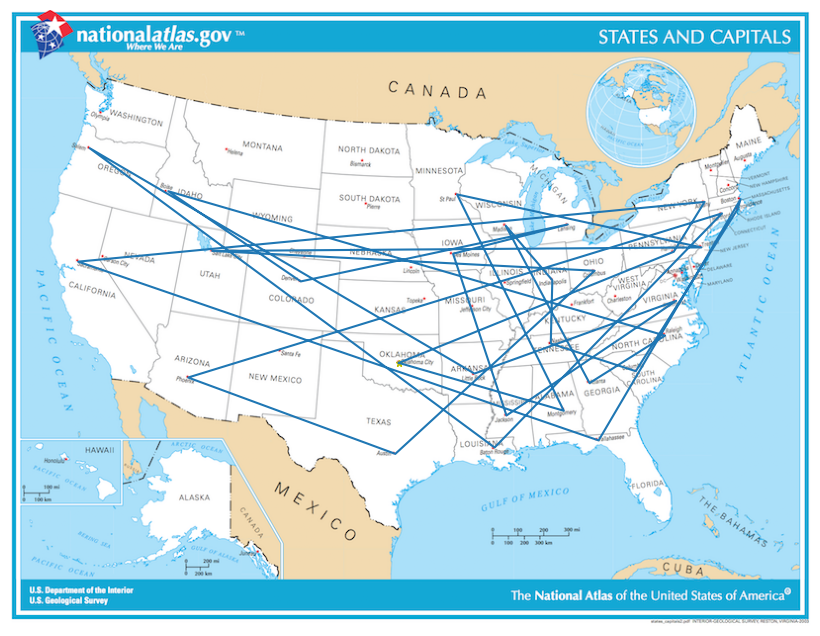

In [29]:
#muestra el camino 

show_path(cities)
path_distance(cities)

In [8]:
import time
from itertools import chain
from typing import Any, Callable, List, Tuple, Union

import numpy as np
import random



class AntColonySolver:
    def __init__(self,
                 cost_fn:                 Callable[[Any,Any], Union[float,int]],                         
                 
                 time=0,                  # run for a fixed amount of time
                 min_time=0,              # minimum runtime
                 timeout=0,               # maximum time in seconds to run for
                 stop_factor=2,           # how many times to redouble effort after new new best path
                 min_round_trips=10,      # minimum number of round trips before stopping
                 max_round_trips=0,       # maximum number of round trips before stopping                 
                 min_ants=0,              # Total number of ants to use
                 max_ants=0,              # Total number of ants to use
                 
                 ant_count=64,            # this is the bottom of the near-optimal range for numpy performance
                 ant_speed=1,             # how many steps do ants travel per epoch

                 distance_power=1,        # power to which distance affects pheromones                 
                 pheromone_power=1.25,    # power to which differences in pheromones are noticed
                 decay_power=0,           # how fast do pheromones decay
                 reward_power=0,          # relative pheromone reward based on best_path_length/path_length 
                 best_path_smell=2,       # queen multiplier for pheromones upon finding a new best path                  
                 start_smell=0,           # amount of starting pheromones [0 defaults to `10**self.distance_power`]

                 verbose=False,

    ):
        assert callable(cost_fn)        
        self.cost_fn         = cost_fn
        self.time            = int(time)
        self.min_time        = int(min_time)
        self.timeout         = int(timeout)
        self.stop_factor     = float(stop_factor)
        self.min_round_trips = int(min_round_trips)
        self.max_round_trips = int(max_round_trips)
        self.min_ants        = int(min_ants)
        self.max_ants        = int(max_ants)
    
        self.ant_count       = int(ant_count)
        self.ant_speed       = int(ant_speed)
        
        self.distance_power  = float(distance_power)     
        self.pheromone_power = float(pheromone_power)
        self.decay_power     = float(decay_power)
        self.reward_power    = float(reward_power)
        self.best_path_smell = float(best_path_smell)
        self.start_smell     = float(start_smell or 10**self.distance_power)
        
        self.verbose         = int(verbose)
        self._initalized     = False
        
        if self.min_round_trips and self.max_round_trips: self.min_round_trips = min(self.min_round_trips, self.max_round_trips)
        if self.min_ants and self.max_ants:               self.min_ants        = min(self.min_ants, self.max_ants)


    def solve_initialize(
            self,
            problem_path: List[Any],
    ) -> None:
        ### Cache of distances between nodes
        self.distances = {
            source: {
                dest: self.cost_fn(source, dest)
                for dest in problem_path
            }
            for source in problem_path
        }

        ### Cache of distance costs between nodes - division in a tight loop is expensive
        self.distance_cost = {
            source: {
                dest: 1 / (1 + self.distances[source][dest]) ** self.distance_power
                for dest in problem_path
            }
            for source in problem_path
        }

        ### This stores the pheromone trail that slowly builds up
        self.pheromones = {
            source: {
                # Encourage the ants to start exploring in all directions and furthest nodes
                dest: self.start_smell
                for dest in problem_path
            }
            for source in problem_path
        }
        
        ### Sanitise input parameters
        if self.ant_count <= 0:
            self.ant_count = len(problem_path)
        if self.ant_speed <= 0:
            self.ant_speed = np.median(list(chain(*[ d.values() for d in self.distances.values() ]))) // 5
        self.ant_speed = int(max(1,self.ant_speed))
        
        ### Heuristic Exports
        self.ants_used   = 0
        self.epochs_used = 0
        self.round_trips = 0
        self._initalized = True        


    def solve(self,
              problem_path: List[Any],
              restart=False,
    ) -> List[Tuple[int,int]]:
        if restart or not self._initalized:
            self.solve_initialize(problem_path)

        ### Here come the ants!
        ants = {
            "distance":    np.zeros((self.ant_count,)).astype('int32'),
            "path":        [ [ problem_path[0] ]   for n in range(self.ant_count) ],
            "remaining":   [ set(problem_path[1:]) for n in range(self.ant_count) ],
            "path_cost":   np.zeros((self.ant_count,)).astype('int32'),
            "round_trips": np.zeros((self.ant_count,)).astype('int32'),
        }

        best_path       = None
        best_path_cost  = np.inf
        best_epochs     = []
        epoch           = 0
        time_start      = time.perf_counter()
        while True:
            epoch += 1

            ### Vectorized walking of ants
            # Small optimization here, testing against `> self.ant_speed` rather than `> 0` 
            #       avoids computing ants_arriving in the main part of this tight loop
            ants_travelling = (ants['distance'] > self.ant_speed)
            ants['distance'][ ants_travelling ] -= self.ant_speed
            if all(ants_travelling):
                continue  # skip termination checks until the next ant arrives
            
            ### Vectorized checking of ants arriving
            ants_arriving       = np.invert(ants_travelling)
            ants_arriving_index = np.where(ants_arriving)[0]
            for i in ants_arriving_index:

                ### ant has arrived at next_node
                this_node = ants['path'][i][-1]
                next_node = self.next_node(ants, i)
                ants['distance'][i]  = self.distances[ this_node ][ next_node ]
                ants['remaining'][i] = ants['remaining'][i] - {this_node}
                ants['path_cost'][i] = ants['path_cost'][i] + ants['distance'][i]
                ants['path'][i].append( next_node )

                ### ant has returned home to the colony
                if not ants['remaining'][i] and ants['path'][i][0] == ants['path'][i][-1]:
                    self.ants_used  += 1
                    self.round_trips = max(self.round_trips, ants["round_trips"][i] + 1)

                    ### We have found a new best path - inform the Queen
                    was_best_path = False
                    if ants['path_cost'][i] < best_path_cost:
                        was_best_path  = True
                        best_path_cost = ants['path_cost'][i]
                        best_path      = ants['path'][i]
                        best_epochs   += [ epoch ]
                        if self.verbose:
                            print({
                                "path_cost":   int(ants['path_cost'][i]),
                                "ants_used":   self.ants_used,
                                "epoch":       epoch,
                                "round_trips": ants['round_trips'][i] + 1,
                                "clock":       int(time.perf_counter() - time_start),
                            })

                    ### leave pheromone trail
                    # doing this only after ants arrive home improves initial exploration
                    #  * self.round_trips has the effect of decaying old pheromone trails
                    # ** self.reward_power = -3 has the effect of encouraging ants to explore longer routes
                    #                           in combination with doubling pheromone for best_path
                    reward = 1
                    if self.reward_power: reward *= ((best_path_cost / ants['path_cost'][i]) ** self.reward_power)
                    if self.decay_power:  reward *= (self.round_trips ** self.decay_power)
                    for path_index in range( len(ants['path'][i]) - 1 ):
                        this_node = ants['path'][i][path_index]
                        next_node = ants['path'][i][path_index+1]
                        self.pheromones[this_node][next_node] += reward
                        self.pheromones[next_node][this_node] += reward
                        if was_best_path:
                            # Queen orders to double the number of ants following this new best path                            
                            self.pheromones[this_node][next_node] *= self.best_path_smell
                            self.pheromones[next_node][this_node] *= self.best_path_smell


                    ### reset ant
                    ants["distance"][i]     = 0
                    ants["path"][i]         = [ problem_path[0] ]
                    ants["remaining"][i]    = set(problem_path[1:])
                    ants["path_cost"][i]    = 0
                    ants["round_trips"][i] += 1


            ### Do we terminate?
            
            # Always wait for at least 1 solutions (note: 2+ solutions are not guaranteed)
            if not len(best_epochs): continue 
            
            # Timer takes priority over other constraints
            if self.time or self.min_time or self.timeout:
                clock = time.perf_counter() - time_start
                if self.time:
                    if clock > self.time: break
                    else:                 continue
                if self.min_time and clock < self.min_time: continue
                if self.timeout  and clock > self.timeout:  break
            
            # First epoch only has start smell - question: how many epochs are required for a reasonable result?
            if self.min_round_trips and self.round_trips <  self.min_round_trips: continue        
            if self.max_round_trips and self.round_trips >= self.max_round_trips: break

            # This factor is most closely tied to computational power                
            if self.min_ants and self.ants_used <  self.min_ants: continue        
            if self.max_ants and self.ants_used >= self.max_ants: break            
            
            # Lets keep redoubling our efforts until we can't find anything more
            if self.stop_factor and epoch > (best_epochs[-1] * self.stop_factor): break
                                
            # Nothing else is stopping us: Queen orders the ants to continue!      
            if True: continue
            
            
            
        ### We have (hopefully) found a near-optimal path, report back to the Queen
        self.epochs_used = epoch
        self.round_trips = np.max(ants["round_trips"])
        return best_path

#****************************************************************************************************************************************************************************************************************************
    def next_node(self, ants, index):
        this_node   = ants['path'][index][-1]

        weights     = []
        weights_sum = 0
        if not ants['remaining'][index]: return ants['path'][index][0]  # return home


        for next_node in ants['remaining'][index]:
            if next_node == this_node: continue
            reward = (
                    self.pheromones[this_node][next_node] ** self.pheromone_power
                    * self.distance_cost[this_node][next_node]  # Prefer shorter paths
            )
            weights.append( (reward, next_node) )
            weights_sum   += reward

        # Pick a random path in proportion to the weight of the pheromone


        
        rand = random.random() * weights_sum
        for (weight, next_node) in weights:
            if rand > weight: rand -= weight
            else:             break
        return next_node
#****************************************************************************************************************************************************************************************************************************            
        
def AntColonyRunner(cities, verbose=False, plot=False, label={}, algorithm=AntColonySolver, **kwargs):
    solver     = algorithm(cost_fn=distance, verbose=verbose, **kwargs)
    start_time = time.perf_counter()
    result     = solver.solve(cities)
    stop_time  = time.perf_counter()
    if label: kwargs = { **label, **kwargs }
        
    for key in ['verbose', 'plot', 'animate', 'label', 'min_time', 'max_time']:
        if key in kwargs: del kwargs[key]
    print("N={:<3d} | {:5.0f} -> {:4.0f} | {:4.0f}s | ants: {:5d} | trips: {:4d} | "
          .format(len(cities), path_distance(cities), path_distance(result), (stop_time - start_time), solver.ants_used, solver.round_trips)
          + " ".join([ f"{k}={v}" for k,v in kwargs.items() ])
    )
    if plot:
        show_path(result)
    return result

{'path_cost': 6322, 'ants_used': 1, 'epoch': 6184, 'round_trips': 1, 'clock': 0}
{'path_cost': 5635, 'ants_used': 67, 'epoch': 13395, 'round_trips': 2, 'clock': 0}
{'path_cost': 5250, 'ants_used': 129, 'epoch': 17787, 'round_trips': 3, 'clock': 0}
{'path_cost': 5226, 'ants_used': 2088, 'epoch': 235021, 'round_trips': 34, 'clock': 2}
{'path_cost': 4898, 'ants_used': 2270, 'epoch': 254332, 'round_trips': 36, 'clock': 2}
{'path_cost': 4877, 'ants_used': 7261, 'epoch': 766316, 'round_trips': 114, 'clock': 7}
{'path_cost': 4355, 'ants_used': 7674, 'epoch': 806945, 'round_trips': 120, 'clock': 8}
{'path_cost': 4246, 'ants_used': 7967, 'epoch': 833994, 'round_trips': 125, 'clock': 8}
{'path_cost': 4152, 'ants_used': 8046, 'epoch': 840733, 'round_trips': 126, 'clock': 8}
{'path_cost': 4128, 'ants_used': 8453, 'epoch': 875289, 'round_trips': 135, 'clock': 8}
{'path_cost': 4072, 'ants_used': 8506, 'epoch': 879497, 'round_trips': 134, 'clock': 8}
{'path_cost': 4020, 'ants_used': 8770, 'epoch': 89

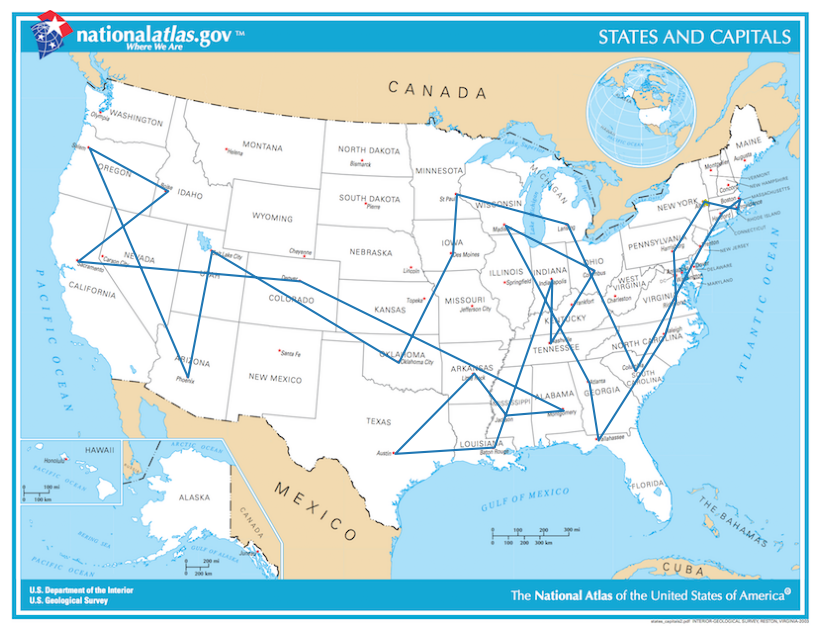

In [9]:
results = AntColonyRunner(cities, distance_power=0, min_time=30, verbose=True, plot=True)

In [10]:
results_converged = [ AntColonyRunner(cities) for i in range(10) ]

N=30  |  7074 -> 2339 |    2s | ants:  2242 | trips:   36 | 
N=30  |  7074 -> 2251 |    2s | ants:  2330 | trips:   37 | 
N=30  |  7074 -> 2227 |    1s | ants:   942 | trips:   15 | 
N=30  |  7074 -> 2422 |    3s | ants:  3852 | trips:   61 | 
N=30  |  7074 -> 2464 |    1s | ants:   912 | trips:   15 | 
N=30  |  7074 -> 2223 |    1s | ants:  1705 | trips:   28 | 
N=30  |  7074 -> 2373 |    1s | ants:  1458 | trips:   24 | 
N=30  |  7074 -> 2282 |    1s | ants:  1452 | trips:   23 | 
N=30  |  7074 -> 2284 |    3s | ants:  3647 | trips:   58 | 
N=30  |  7074 -> 2374 |    1s | ants:   855 | trips:   14 | 


In [11]:
results_timed = [ AntColonyRunner(cities, time=10) for i in range(10) ]

N=30  |  7074 -> 2311 |   10s | ants: 13007 | trips:  205 | time=10
N=30  |  7074 -> 2237 |   10s | ants: 13601 | trips:  214 | time=10
N=30  |  7074 -> 2299 |   10s | ants: 13866 | trips:  220 | time=10
N=30  |  7074 -> 2188 |   10s | ants: 14087 | trips:  222 | time=10
N=30  |  7074 -> 2239 |   10s | ants: 14295 | trips:  226 | time=10
N=30  |  7074 -> 2353 |   10s | ants: 14333 | trips:  226 | time=10
N=30  |  7074 -> 2206 |   10s | ants: 14608 | trips:  231 | time=10
N=30  |  7074 -> 2385 |   10s | ants: 14136 | trips:  222 | time=10
N=30  |  7074 -> 2245 |   10s | ants: 13929 | trips:  219 | time=10
N=30  |  7074 -> 2326 |   10s | ants: 13562 | trips:  213 | time=10


In [12]:
import pandas as pd
results_converged_stats = pd.Series([ path_distance(path) for path in results_converged ]).describe()
results_timed_stats     = pd.Series([ path_distance(path) for path in results_timed     ]).describe()
pd.DataFrame({
    "results_converged": results_converged_stats,
    "results_timed":     results_timed_stats,
    "difference":        results_converged_stats - results_timed_stats,
}).T.round(1)

,count,mean,std,min,25%,50%,75%,max
results_converged,10.0,2323.9,83.4,2223.0,2258.8,2311.5,2373.8,2464.0
results_timed,10.0,2278.9,65.4,2188.0,2237.5,2272.0,2322.2,2385.0
difference,0.0,45.0,18.0,35.0,21.2,39.5,51.5,79.0
